In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_excel("cbc_information.xlsx")

In [6]:
df.head()

,ID,WBC,LYMp,MIDp,NEUTp,LYMn,MIDn,NEUTn,RBC,HGB,...,MCV,MCH,MCHC,RDWSD,RDWCV,PLT,MPV,PDW,PCT,PLCR
0,1,10.0,43.2,6.7,50.1,4.3,0.7,5.0,2.77,7.3,...,87.7,26.3,30.1,35.3,11.4,189.0,9.2,12.5,0.17,22.3
1,2,10.0,42.4,5.3,52.3,4.2,0.5,5.3,2.84,7.3,...,88.2,25.7,20.2,35.3,11.4,180.0,8.9,12.5,0.16,19.5
2,3,7.2,30.7,8.6,60.7,2.2,0.6,4.4,3.97,9.0,...,77.0,22.6,29.5,37.2,13.7,148.0,10.1,14.3,0.14,30.5
3,4,6.0,30.2,6.3,63.5,1.8,0.4,3.8,4.22,3.8,...,77.9,23.2,29.8,46.5,17.0,143.0,8.6,11.3,0.12,16.4
4,5,4.2,39.1,7.2,53.7,1.6,0.3,2.3,3.93,0.4,...,80.6,23.9,29.7,42.7,15.1,236.0,19.5,12.8,0.22,24.8


In [7]:
# ID: Patients Identifier
# WBC: White Blood Cell, Normal Ranges: 4.0 to 10.0, Unit: 10^9/L.
# LYMp: Lymphocytes percentage, which is a type of white blood cell, Normal Ranges: 20.0 to 40.0, Unit: %
# MIDp: Indicates the percentage combined value of the other types of white blood cells not classified as lymphocytes or granulocytes, Normal Ranges: 1.0 to 15.0, Unit: %
# NEUTp: Neutrophils are a type of white blood cell (leukocytes); neutrophils percentage, Normal Ranges: 50.0 to 70.0, Unit: %
# LYMn: Lymphocytes number are a type of white blood cell, Normal Ranges: 0.6 to 4.1, Unit: 10^9/L.
# MIDn: Indicates the combined number of other white blood cells not classified as lymphocytes or granulocytes, Normal Ranges: 0.1 to 1.8, Unit: 10^9/L.
# NEUTn: Neutrophils Number, Normal Ranges: 2.0 to 7.8, Unit: 10^9/L.
# RBC: Red Blood Cell, Normal Ranges: 3.50 to 5.50, Unit: 10^12/L
# HGB: Hemoglobin, Normal Ranges: 11.0 to 16.0, Unit: g/dL
# HCT: Hematocrit is the proportion, by volume, of the Blood that consists of red blood cells, Normal Ranges: 36.0 to 48.0, Unit: %
# MCV: Mean Corpuscular Volume, Normal Ranges: 80.0 to 99.0, Unit: fL
# MCH: Mean Corpuscular Hemoglobin is the average amount of haemoglobin in the average red cell, Normal Ranges: 26.0 to 32.0, Unit: pg
# MCHC: Mean Corpuscular Hemoglobin Concentration, Normal Ranges: 32.0 to 36.0, Unit: g/dL
# RDWSD: Red Blood Cell Distribution Width, Normal Ranges: 37.0 to 54.0, Unit: fL
# RDWCV: Red blood cell distribution width, Normal Ranges: 11.5 to 14.5, Unit: %
# PLT: Platelet Count, Normal Ranges: 100 to 400, Unit: 10^9/L
# MPV: Mean Platelet Volume, Normal Ranges: 7.4 to 10.4, Unit: fL
# PDW: Red Cell Distribution Width, Normal Ranges: 10.0 to 17.0, Unit: %
# PCT: The level of Procalcitonin in the Blood, Normal Ranges: 0.10 to 0.28, Unit: %
## PLCR: Platelet Large Cell Ratio, Normal Ranges: 13.0 to 43.0, Unit: %

In [8]:
# All the below data is according to this research paper
#https://www.ncbi.nlm.nih.gov/books/NBK190583/

#https://www.ncbi.nlm.nih.gov/books/NBK545151/

In [9]:
# The most widely used cut-off values of MCV and MCH for indicating thalassaemia are 79 fl and 27 pg, respectively.

In [10]:
# Silent β-thalassemia carriers: Normal or slightly reduced MCV and MCH
# Carriers of both β and α-thalassemia: May have normal MCV and MCH.
# α-thalassemia carriers: Generally have lower MCV and MCH.
# α+-thalassemia (-α/αα) carriers: May have normal or reduced MCV and MCH.
# α-thalassemia (-α/-α or --/αα) carriers: Always have reduced MCV and MCH.

# Mild/Minor thalassemia (Hb: 6 to 10g/dl)
# Moderate to severe thalassemia (Hb less than 5 to 6g/dl)

In [11]:
# Silent β-thalassemia carriers or Thalassemia Minor  : Increased RBC count
#                                                       Decreased MCV: 60–70 fL
#                                                       Decreased MCH: 19–23 pg
#                                                       Hemoglobin: Can range from 2 g/dL to normal

In [12]:
# Beta thalassemia major : Hemoglobin level: Usually less than 7 g/dL
#                          MCH: Low, less than 20 pg

In [13]:
df = pd.DataFrame(df)

In [14]:
df

,ID,WBC,LYMp,MIDp,NEUTp,LYMn,MIDn,NEUTn,RBC,HGB,...,MCV,MCH,MCHC,RDWSD,RDWCV,PLT,MPV,PDW,PCT,PLCR
0,1,10.0,43.2,6.7,50.1,4.3,0.7,5.0,2.77,7.3,...,87.7,26.3,30.1,35.3,11.4,189.0,9.2,12.5,0.17,22.30
1,2,10.0,42.4,5.3,52.3,4.2,0.5,5.3,2.84,7.3,...,88.2,25.7,20.2,35.3,11.4,180.0,8.9,12.5,0.16,19.50
2,3,7.2,30.7,8.6,60.7,2.2,0.6,4.4,3.97,9.0,...,77.0,22.6,29.5,37.2,13.7,148.0,10.1,14.3,0.14,30.50
3,4,6.0,30.2,6.3,63.5,1.8,0.4,3.8,4.22,3.8,...,77.9,23.2,29.8,46.5,17.0,143.0,8.6,11.3,0.12,16.40
4,5,4.2,39.1,7.2,53.7,1.6,0.3,2.3,3.93,0.4,...,80.6,23.9,29.7,42.7,15.1,236.0,19.5,12.8,0.22,24.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,2.7,43.4,7.1,49.5,1.2,0.2,1.3,4.77,13.2,...,86.4,27.4,31.7,37.2,12.2,169.0,10.1,14.3,0.17,28.60
496,497,6.2,35.0,6.9,57.6,2.2,0.4,3.6,4.82,11.6,...,76.7,24.0,31.4,37.2,13.8,177.0,9.9,13.6,0.18,29.00
497,498,8.4,29.2,7.3,63.5,2.0,0.5,4.3,4.40,9.9,...,68.8,22.7,33.0,38.0,10.6,133.1,9.6,12.8,0.12,24.60
498,499,7.4,19.0,8.5,72.5,0.8,0.3,2.9,3.34,7.4,...,70.6,21.9,30.9,36.2,11.0,125.0,10.7,15.9,0.13,33.60


In [15]:
# Created the Target variable

In [16]:
def categorize_thalassemia(row):
    if 60 <= row['MCV'] <= 70 and 19 <= row['MCH'] <= 23 and 6 <= row['HGB'] <= 11 and 4.5 <= row['RBC'] <= 6.3:
        return 'Beta-Thalassemia Minor'
    elif 50 <= row['MCV'] <= 70 and 12 <= row['MCH'] <= 20 and 6 <= row['HGB'] and 4.5 <= row['RBC'] <= 6.3:
        return 'Beta-Thalassemia Major'
    elif row['MCV'] <= 79 and row['MCH'] < 27 and 7 <= row['HGB'] <= 10 and 4.5 <= row['RBC'] <= 6.3:
        return 'Alpha-Thalassemia Minor'
    elif row['MCV'] <= 79 and row['MCH'] < 27 and 5 <= row['HGB'] <= 6 and 4.5 <= row['RBC'] <= 6.3:
        return 'Alpha-Thalassemia Major'
    else:
        return 'Normal'

In [17]:
df['Target'] = df.apply(categorize_thalassemia, axis=1)

In [18]:
df

,ID,WBC,LYMp,MIDp,NEUTp,LYMn,MIDn,NEUTn,RBC,HGB,...,MCH,MCHC,RDWSD,RDWCV,PLT,MPV,PDW,PCT,PLCR,Target
0,1,10.0,43.2,6.7,50.1,4.3,0.7,5.0,2.77,7.3,...,26.3,30.1,35.3,11.4,189.0,9.2,12.5,0.17,22.30,Normal
1,2,10.0,42.4,5.3,52.3,4.2,0.5,5.3,2.84,7.3,...,25.7,20.2,35.3,11.4,180.0,8.9,12.5,0.16,19.50,Normal
2,3,7.2,30.7,8.6,60.7,2.2,0.6,4.4,3.97,9.0,...,22.6,29.5,37.2,13.7,148.0,10.1,14.3,0.14,30.50,Normal
3,4,6.0,30.2,6.3,63.5,1.8,0.4,3.8,4.22,3.8,...,23.2,29.8,46.5,17.0,143.0,8.6,11.3,0.12,16.40,Normal
4,5,4.2,39.1,7.2,53.7,1.6,0.3,2.3,3.93,0.4,...,23.9,29.7,42.7,15.1,236.0,19.5,12.8,0.22,24.80,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,2.7,43.4,7.1,49.5,1.2,0.2,1.3,4.77,13.2,...,27.4,31.7,37.2,12.2,169.0,10.1,14.3,0.17,28.60,Normal
496,497,6.2,35.0,6.9,57.6,2.2,0.4,3.6,4.82,11.6,...,24.0,31.4,37.2,13.8,177.0,9.9,13.6,0.18,29.00,Normal
497,498,8.4,29.2,7.3,63.5,2.0,0.5,4.3,4.40,9.9,...,22.7,33.0,38.0,10.6,133.1,9.6,12.8,0.12,24.60,Normal
498,499,7.4,19.0,8.5,72.5,0.8,0.3,2.9,3.34,7.4,...,21.9,30.9,36.2,11.0,125.0,10.7,15.9,0.13,33.60,Normal


In [19]:
df.isnull().sum()

ID        0
WBC       0
LYMp      0
MIDp      0
NEUTp     0
LYMn      0
MIDn      0
NEUTn     0
RBC       0
HGB       0
HCT       0
MCV       0
MCH       0
MCHC      0
RDWSD     0
RDWCV     0
PLT       0
MPV       0
PDW       0
PCT       0
PLCR      0
Target    0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
print(df['Target'].value_counts())

Target
Normal                     454
Beta-Thalassemia Major      17
Beta-Thalassemia Minor      16
Alpha-Thalassemia Minor     13
Name: count, dtype: int64


In [22]:
# Convert DataFrame to CSV
csv_filename = 'thalassemia_data.csv'
df.to_csv(csv_filename, index=False)

# Provide a download link for the CSV file
from IPython.display import FileLink
FileLink(csv_filename)

c:\Users\Lenovo\OneDrive\Desktop\Thalessimia\thalassemia_data.csv

In [23]:
df = df.drop(columns=['MPV','NEUTp','LYMn','LYMp','PDW','PLCR','WBC','MIDn','NEUTn','MIDp','PCT','PLT','RDWSD','RDWCV','HCT'])

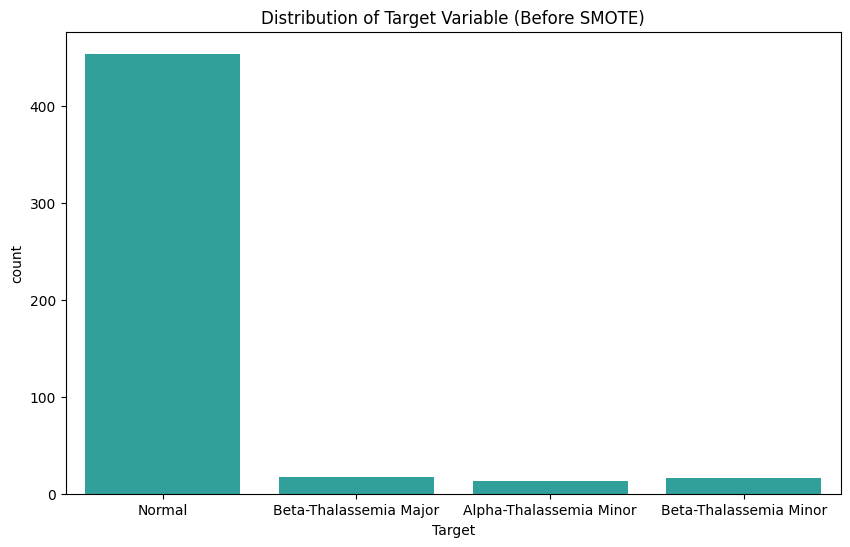

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df, color='lightseagreen')
plt.title('Distribution of Target Variable (Before SMOTE)')
plt.show()

In [25]:
# The Dataset is Unbalanced

In [27]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['ID', 'Target'])
y = df['Target']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [28]:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Target'] = y_resampled

In [29]:
print(resampled_df['Target'].value_counts())

Target
Normal                     454
Beta-Thalassemia Major     454
Alpha-Thalassemia Minor    454
Beta-Thalassemia Minor     454
Name: count, dtype: int64


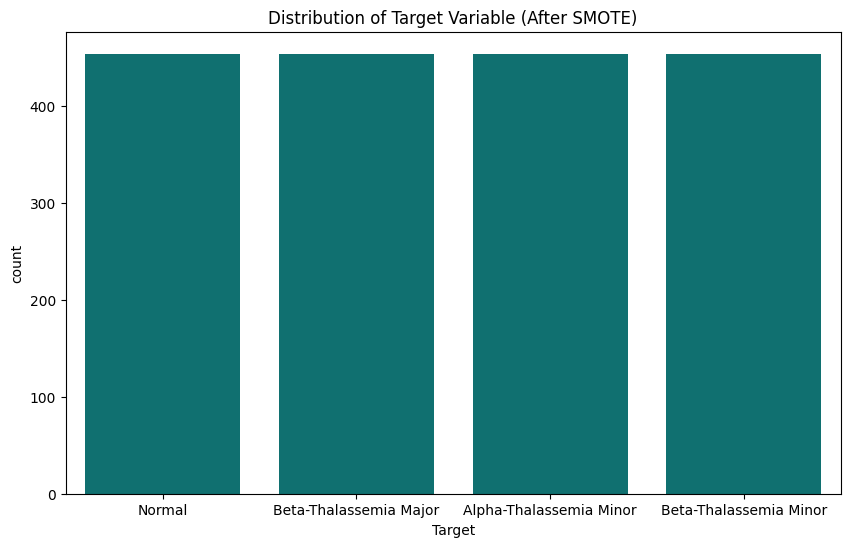

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=resampled_df, color='teal')
plt.title('Distribution of Target Variable (After SMOTE)')
plt.show()

In [31]:
resampled_df

,RBC,HGB,MCV,MCH,MCHC,Target
0,2.770000,7.300000,87.700000,26.300000,30.100000,Normal
1,2.840000,7.300000,88.200000,25.700000,20.200000,Normal
2,3.970000,9.000000,77.000000,22.600000,29.500000,Normal
3,4.220000,3.800000,77.900000,23.200000,29.800000,Normal
4,3.930000,0.400000,80.600000,23.900000,29.700000,Normal
...,...,...,...,...,...,...
1811,4.721445,9.755024,67.962967,20.600000,30.403349,Beta-Thalassemia Minor
1812,4.938225,9.885251,68.146500,19.684500,28.861250,Beta-Thalassemia Minor
1813,4.542204,9.300000,68.829276,20.453619,29.765791,Beta-Thalassemia Minor
1814,4.580168,9.376270,68.693223,20.462715,29.832207,Beta-Thalassemia Minor


In [46]:
alpha_minor_df = resampled_df[resampled_df['Target'] == 'Alpha-Thalassemia Minor']

alpha_minor_df.head()

,RBC,HGB,MCV,MCH,MCHC,Target
19,4.54,9.6,71.4,21.1,29.6,Alpha-Thalassemia Minor
20,4.77,9.8,71.6,20.5,28.7,Alpha-Thalassemia Minor
137,4.62,9.3,71.5,20.1,28.1,Alpha-Thalassemia Minor
169,4.61,10.0,75.9,21.6,28.6,Alpha-Thalassemia Minor
191,4.54,10.0,77.3,22.0,28.5,Alpha-Thalassemia Minor


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report :-")
print(classification_report(y_test, y_pred))

print("\n")

print("Confusion Matrix :-")
print(confusion_matrix(y_test, y_pred))



Classification Report :-
                         precision    recall  f1-score   support

Alpha-Thalassemia Minor       1.00      1.00      1.00        84
 Beta-Thalassemia Major       0.98      1.00      0.99        93
 Beta-Thalassemia Minor       1.00      1.00      1.00        98
                 Normal       1.00      0.98      0.99        89

               accuracy                           0.99       364
              macro avg       0.99      0.99      0.99       364
           weighted avg       0.99      0.99      0.99       364



Confusion Matrix :-
[[84  0  0  0]
 [ 0 93  0  0]
 [ 0  0 98  0]
 [ 0  2  0 87]]


<Figure size 1200x1800 with 0 Axes>

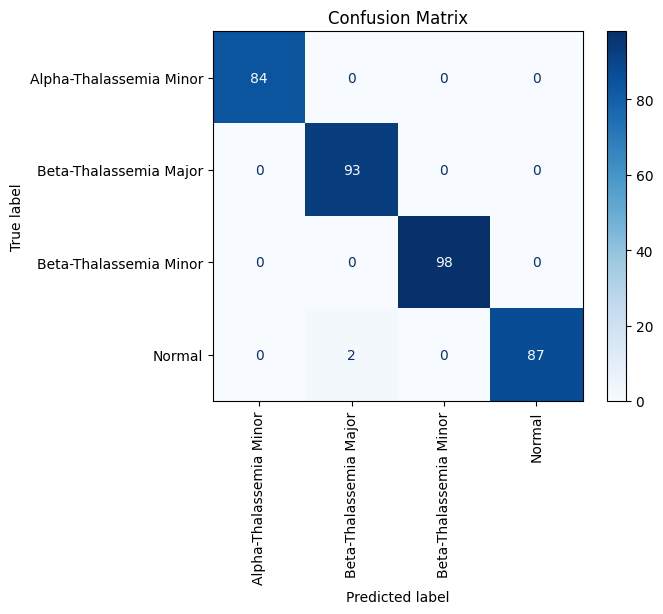

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

# Set the figure size
plt.figure(figsize=(12, 18))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')

disp.ax_.set_title('Confusion Matrix')
plt.xticks(rotation=90)
plt.show()


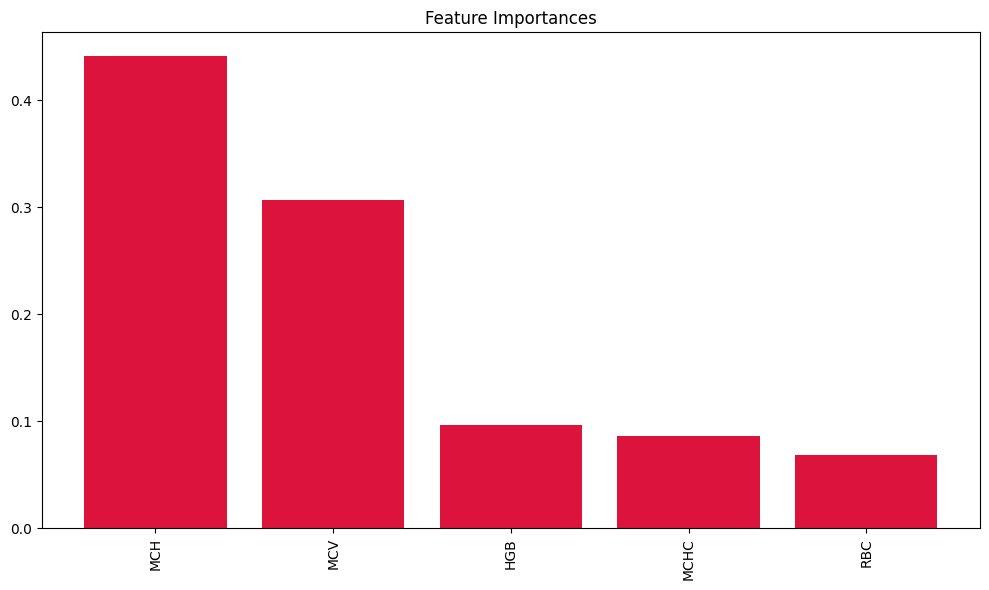

In [37]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center', color='crimson')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [38]:
# Cross Validation

In [39]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

for train_idx, test_idx in cv.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print('\n')
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Cross-Validation Scores: [1.         0.99449036 0.9862259  0.99449036 0.99724518]
Mean Accuracy: 0.9944903581267217
Classification Report:
                         precision    recall  f1-score   support

Alpha-Thalassemia Minor       1.00      1.00      1.00        91
 Beta-Thalassemia Major       1.00      1.00      1.00        91
 Beta-Thalassemia Minor       1.00      1.00      1.00        91
                 Normal       1.00      1.00      1.00        91

               accuracy                           1.00       364
              macro avg       1.00      1.00      1.00       364
           weighted avg       1.00      1.00      1.00       364



Confusion Matrix:
[[91  0  0  0]
 [ 0 91  0  0]
 [ 0  0 91  0]
 [ 0  0  0 91]]
Classification Report:
                         precision    recall  f1-score   support

Alpha-Thalassemia Minor       0.99      1.00      0.99        91
 Beta-Thalassemia Major       0.99      1.00      0.99        91
 Beta-Thalassemia Minor       1.00    

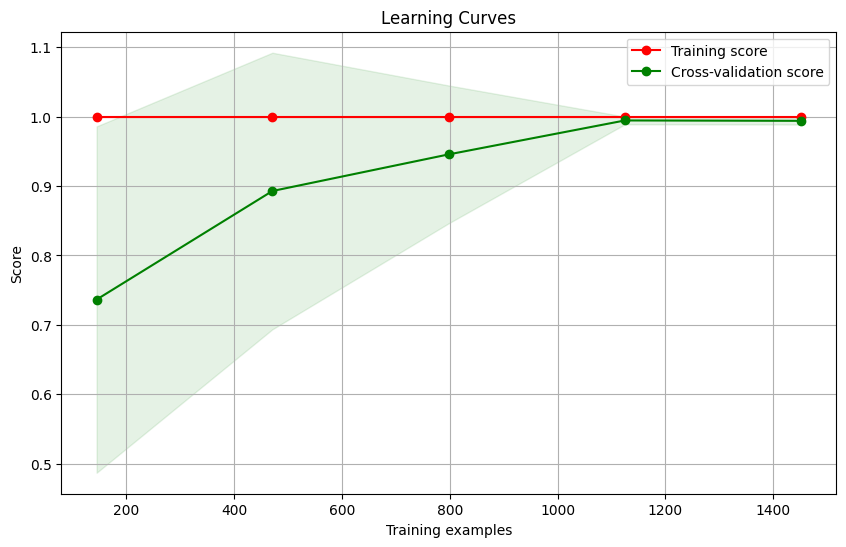

In [40]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_resampled, y_resampled, cv=5, n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()


In [41]:
def take_input():
    features = {}
    features['RBC'] = float(input("Enter RBC (10^12/L): "))
    features['HGB'] = float(input("Enter Hemoglobin (g/dL): "))
    features['MCV'] = float(input("Enter Mean Corpuscular Volume (fL): "))
    features['MCH'] = float(input("Enter Mean Corpuscular Hemoglobin (pg): "))
    features['MCHC'] = float(input("Enter Mean Corpuscular Hemoglobin Concentration (g/dL): "))
    return features

def predict(model, features):
    # Convert features to a numpy array
    feature_values = np.array([list(features.values())])
    # Predict the target using the trained model
    prediction = model.predict(feature_values)
    return prediction

# Example usage:
user_input = take_input()
thalassemia_condition = predict(model, user_input)

print(f"The predicted Thalassemia condition is: {thalassemia_condition[0]}")


The predicted Thalassemia condition is: Normal


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
import pickle

# Assuming your trained model is named 'model'
model_filename = 'model.pkl'

# Save the model to disk
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved model to {model_filename}")


Saved model to model.pkl
